This file we focus on finding relationshipts among features, try PCA to reduce the dimension of data

In [5]:
from sklearn.decomposition import PCA
import pandas as pd


nfdf = pd.read_csv('../data/nfdf.csv')
nfdf.columns

Index(['SrcBytes', 'DstBytes', 'SrcLoad', 'DstLoad', 'SIntPkt', 'DIntPkt',
       'SrcJitter', 'DstJitter', 'Dur', 'TotPkts', 'TotBytes', 'Load', 'Rate',
       'Label'],
      dtype='object')

In [17]:
nf_X = nfdf.iloc[:, :-1]
nf_Y = nfdf.iloc[:, -1]

nf_X.head()

,SrcBytes,DstBytes,SrcLoad,DstLoad,SIntPkt,DIntPkt,SrcJitter,DstJitter,Dur,TotPkts,TotBytes,Load,Rate
0,496,186,180659.0,60220.0,5.491000,2.8145,4.466698,2.7445,0.016473,7,682,240879.0,364.232
1,496,186,285030.0,95010.0,3.480333,2.3295,2.516453,2.2855,0.010441,7,682,380040.0,574.658
2,496,186,200188.0,66729.0,4.955333,2.3725,4.186609,2.3385,0.014866,7,682,266918.0,403.606
3,496,186,205738.0,68579.0,4.821667,2.8240,3.677997,2.7860,0.014465,7,682,274317.0,414.794
4,496,186,106503.0,35501.0,9.314333,7.3005,6.594388,7.2665,0.027943,7,682,142003.0,214.723


In [7]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
nf_X = StandardScaler().fit_transform(nf_X)

In [8]:
pca = PCA(n_components=13)
# principalComponents = pca.fit_transform(nf_X)
pca = pca.fit(nf_X)
pca.explained_variance_ratio_

array([4.02310402e-01, 2.71309664e-01, 1.74188962e-01, 7.31429221e-02,
       5.88758214e-02, 1.35267280e-02, 3.91570197e-03, 1.33984959e-03,
       1.06501818e-03, 3.24777642e-04, 1.53545627e-07, 3.34301069e-12,
       2.62814790e-27])

In [9]:
pca_data = pca.transform(nf_X)

In [16]:
principalDf = pd.DataFrame(data = pca_data[:, :6]
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.012510,-0.616571,-0.197782,0.142217,0.078275,0.099383
1,-0.685909,1.170894,0.648433,-0.324411,-0.080617,-0.127714
2,-0.123256,-0.285617,-0.034851,0.054440,0.050546,0.059465
3,-0.154722,-0.186591,0.004718,0.030336,0.039152,0.044317
4,0.574809,-1.841572,-0.857826,0.478608,0.166786,0.228308
...,...,...,...,...,...,...
15384,-0.151433,-0.197545,0.000474,0.033088,0.040410,0.045963
15385,-0.618278,0.978984,0.564841,-0.275931,-0.061285,-0.100848
15386,-0.711003,1.230506,0.678456,-0.340369,-0.085202,-0.134706
15387,-0.374073,0.359106,0.269103,-0.113371,-0.007443,-0.023014


In [122]:
finalDf = pd.concat([principalDf, nf_Y], axis = 1)

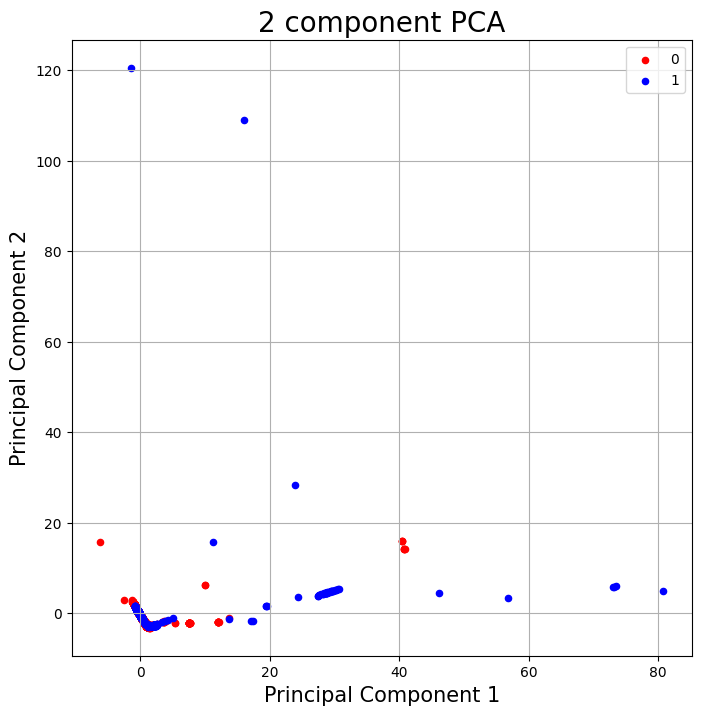

In [123]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

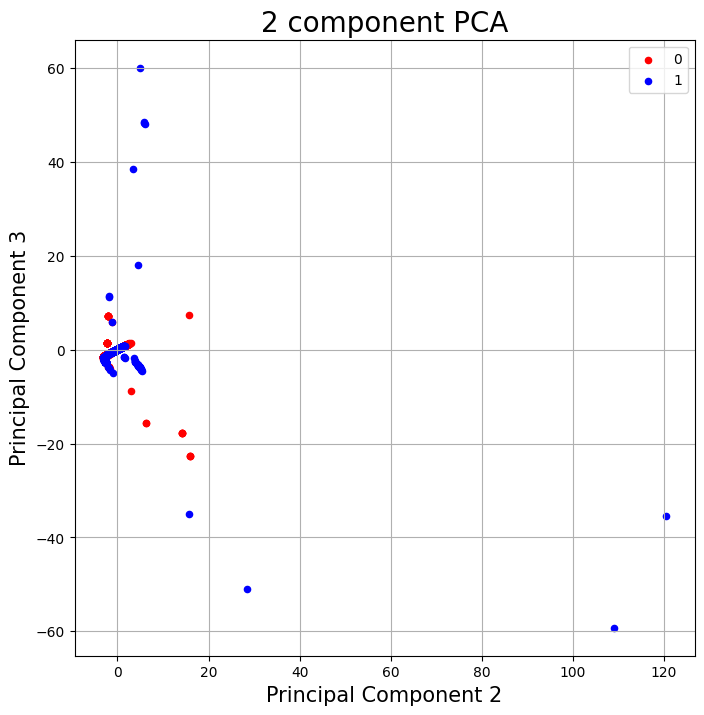

In [124]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc2']
               , finalDf.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

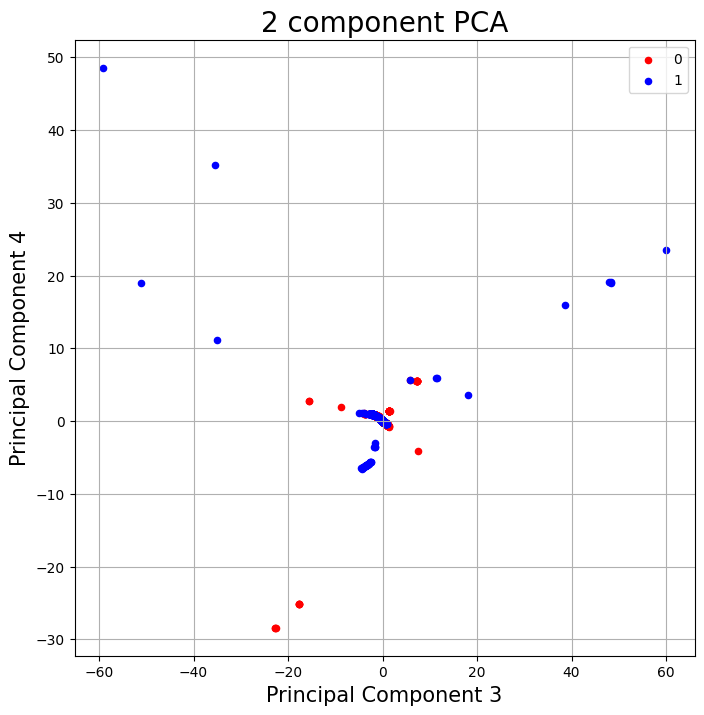

In [125]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc3']
               , finalDf.loc[indicesToKeep, 'pc4']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

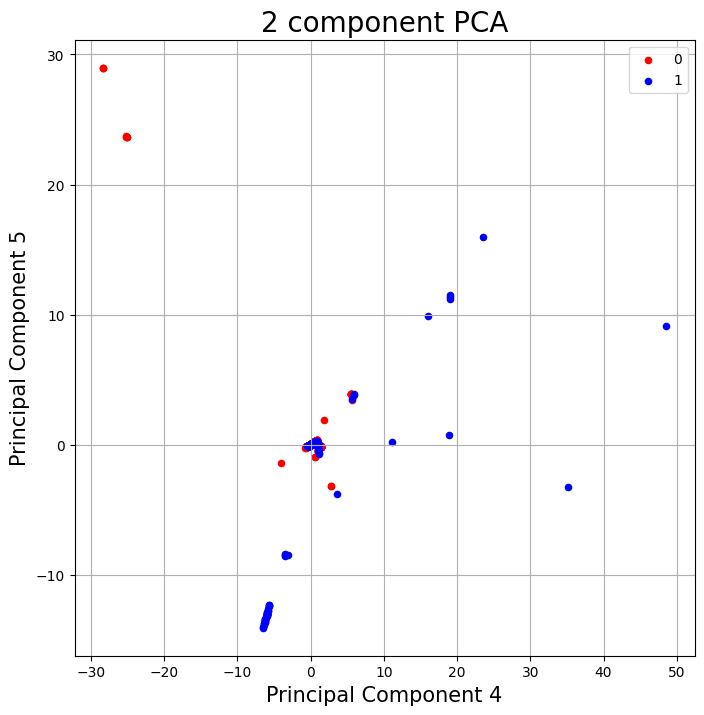

In [126]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 4', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc4']
               , finalDf.loc[indicesToKeep, 'pc5']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

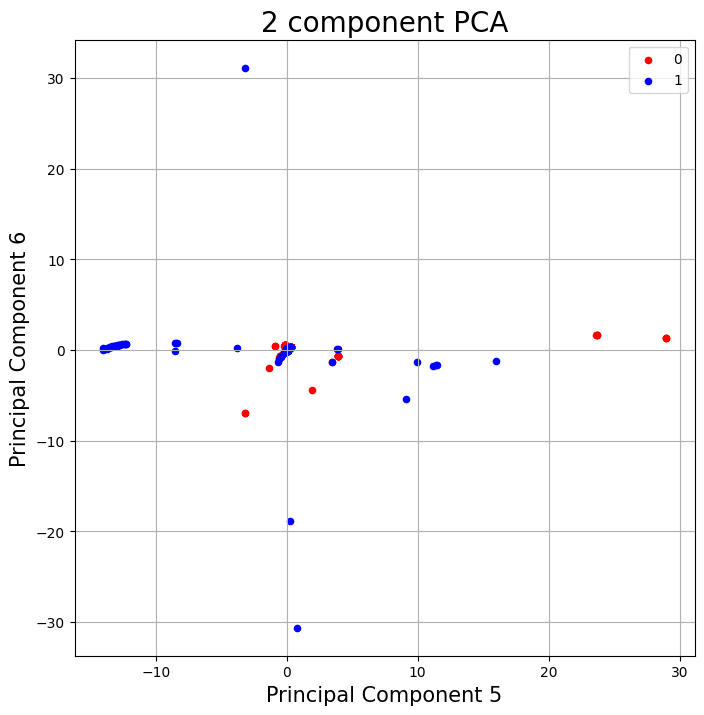

In [127]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 5', fontsize = 15)
ax.set_ylabel('Principal Component 6', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc5']
               , finalDf.loc[indicesToKeep, 'pc6']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()